## Setup

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.output_result { max-width:90% !important; }</style>"))

import warnings
warnings.filterwarnings("ignore")

import numpy as np
np.set_printoptions(precision=3)
np.set_printoptions(linewidth=170)
np.set_printoptions(suppress=True)
np.random.seed(8)

import matplotlib.pyplot as plt
%matplotlib inline

from time import time, sleep
sleep(0.2)

C:\Users\raziel lab\AppData\Local\Temp\ipykernel_38516\4262382925.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## Imports & Parameters

In [2]:
import pandas as pd
import seaborn as sns

sns.set(style="darkgrid")
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)
random_state = 8

## Loading the data

In [3]:
heating_df = pd.read_csv('C:/Users/raziel lab/PycharmProjects/ConsumptionModels/Models/Data Preprocessing/heating_df.csv')
heating_df = heating_df.iloc[:,:12]
print(heating_df.shape)
heating_df.head()

(1, 12)


,January-19,February-19,March-19,April-19,May-19,June-19,July-19,August-19,September-19,October-19,November-19,December-19
0,104203.82,90783.725,150913.14,38223.002,0.0,85354.0,419.76,43564.25,0.0,58.61,0.0,102487.294


In [4]:
fuel_orders_df = pd.read_csv('C:/Users/raziel lab/PycharmProjects/ConsumptionModels/Models/Data Preprocessing/fuel_orders_df.csv')
print(fuel_orders_df.shape)
fuel_orders_df.head()

(1, 5)


,12/18,01/19,02/19,03/19,04/19
0,139.95,211.52,177.52,158.69,38.14


In [5]:
delta_temperature_df = pd.read_csv('C:/Users/raziel lab/PycharmProjects/ConsumptionModels/Models/Regression Model/Direct/delta_temperature_df.csv')
delta_temperature_df['delta_temperature'] = delta_temperature_df['delta_temperature'].astype(float)
print(delta_temperature_df.shape)
delta_temperature_df

(12, 2)


,month_number,delta_temperature
0,1,10.112043
1,2,8.800952
2,3,8.021075
3,4,3.964000
4,5,4.699140
5,6,7.152444
6,7,8.037419
7,8,7.056344
8,9,4.788667
9,10,2.078065


In [6]:
direct_model_params = pd.read_csv('C:/Users/raziel lab/PycharmProjects/ConsumptionModels/Models/Regression Model/Direct/direct_model_params.csv')
direct_model_params.rename(columns = {'Unnamed: 0':'params'}, inplace = True)
direct_model_params.rename(columns = {'0':'coefficient'}, inplace = True)
print(direct_model_params.shape)
direct_model_params

(9, 2)


,params,coefficient
0,const,3182.636527
1,non_labs_delta_temperature_area,0.243355
2,area_sm,5.535246
3,labs_delta_temperature_area,0.274052
4,c_server,311.523954
5,wet_lab_instruments,594.518660
6,labs_c_desktop,46.416787
7,non_labs_c_desktop,40.555458
8,Group Var,8.618567


In [7]:
direct_model_19_df = pd.read_csv('C:/Users/raziel lab/PycharmProjects/ConsumptionModels/Models/Regression Model/Direct/direct_model_19_df.csv')
print(direct_model_19_df.shape)
direct_model_19_df.head()

(564, 20)


,building_number,lab,c_desktop,c_laptop,c_server,r_domestic,r_industrial,r_other,f_industrial,f_domestic,cv_0,cv_1,cv_2,cv_3,cv_4,delta_temperature,est_1,area_sm,direct_consumption,indirect_consumption
0,14,0,13,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,10.112043,1,2953,32322.67,15.383570
1,14,0,13,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,8.800952,1,2953,20597.35,9.038097
2,14,0,13,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,8.021075,1,2953,19120.75,530.725715
3,14,0,13,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,3.964000,1,2953,12793.32,401.938734
4,14,0,13,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,4.699140,1,2953,15889.49,9995.987708


In [8]:
direct_lmm_model_19_df = pd.read_csv('C:/Users/raziel lab/PycharmProjects/ConsumptionModels/Models/Regression Model/Direct/direct_lmm_model_19_df.csv')
print(direct_lmm_model_19_df.shape)
direct_lmm_model_19_df.head()

(564, 12)


,building_number,lab,labs_c_desktop,non_labs_c_desktop,c_server,wet_lab_instruments,labs_delta_temperature_area,non_labs_delta_temperature_area,delta_temperature,area_sm,direct_consumption,indirect_consumption
0,14,0,0,13,0.0,0.0,0.0,29860.863011,10.112043,2953,32322.67,15.383570
1,14,0,0,13,0.0,0.0,0.0,25989.212381,8.800952,2953,20597.35,9.038097
2,14,0,0,13,0.0,0.0,0.0,23686.235269,8.021075,2953,19120.75,530.725715
3,14,0,0,13,0.0,0.0,0.0,11705.692000,3.964000,2953,12793.32,401.938734
4,14,0,0,13,0.0,0.0,0.0,13876.559785,4.699140,2953,15889.49,9995.987708


In [9]:
direct_lmm_model_19_df['delta_temperature'].iloc[10] = round(direct_lmm_model_19_df['delta_temperature'].iloc[10], 15)
delta_temperature_df['delta_temperature'].iloc[10] = round(delta_temperature_df['delta_temperature'].iloc[10], 15)

In [10]:
direct_lmm_model_19_df_non_labs = direct_lmm_model_19_df[direct_lmm_model_19_df['lab'] == 0]
num_of_non_labs = direct_lmm_model_19_df_non_labs.shape[0]/12
print(direct_lmm_model_19_df_non_labs.shape)

(336, 12)


In [11]:
direct_lmm_model_19_df_labs = direct_lmm_model_19_df[direct_lmm_model_19_df['lab'] == 1]
num_of_labs = direct_lmm_model_19_df_labs.shape[0]/12
print(direct_lmm_model_19_df_labs.shape)

(228, 12)


In [12]:
months = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May.', 'Jun.', 'Jul.', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.']

In [13]:
sum(direct_lmm_model_19_df_non_labs['area_sm'])

1245228

In [14]:
sum(direct_lmm_model_19_df_labs['area_sm'])

879756

# Pie Graphs

### All Consumption Distribution - All University (Year)

In [15]:
all_university_detailed_labels = 'Non-Labs: Air Condition Systems & Fan Coils', 'Labs: Air Condition Systems & Fan Coils', 'Lighting', 'Servers & Related Equipment', 'Wet Laboratory Instruments', 'Non-Labs: Desktops', 'Labs: Desktops', 'Others', 'Cooling', 'Heating'

all_university_non_detailed_labels = 'Air Condition Systems & Fan Coils', 'Lighting', 'Computerization', 'Wet Laboratory Instruments', 'Others', 'Cooling', 'Heating'

In [16]:
all_university_detailed_colors = np.array(['cornflowerblue', 'royalblue', 'burlywood', 'deeppink', 'lightgreen', 'salmon', 'tomato', 'grey', 'paleturquoise', 'darkorange'])

all_university_non_detailed_colors = np.array(['dodgerblue', 'burlywood', 'crimson', 'lightgreen', 'grey', 'paleturquoise', 'darkorange'])

In [17]:
yearly_kwh_non_labs_delta_temperature_area = (direct_model_params['coefficient'][direct_model_params['params'] == 'non_labs_delta_temperature_area']*sum(direct_lmm_model_19_df['non_labs_delta_temperature_area'])).iloc[0]

yearly_kwh_labs_delta_temperature_area = (direct_model_params['coefficient'][direct_model_params['params'] == 'labs_delta_temperature_area']*sum(direct_lmm_model_19_df['labs_delta_temperature_area'])).iloc[0]

yearly_kwh_area = (direct_model_params['coefficient'][direct_model_params['params'] == 'area_sm']*sum(direct_lmm_model_19_df['area_sm'])).iloc[0]

yearly_kwh_c_server = (direct_model_params['coefficient'][direct_model_params['params'] == 'c_server']*sum(direct_lmm_model_19_df['c_server'])).iloc[0]

yearly_kwh_wet_lab_instruments = (direct_model_params['coefficient'][direct_model_params['params'] == 'wet_lab_instruments']*sum(direct_lmm_model_19_df['wet_lab_instruments'])).iloc[0]

yearly_kwh_non_labs_c_desktop = (direct_model_params['coefficient'][direct_model_params['params'] == 'non_labs_c_desktop']*sum(direct_lmm_model_19_df['non_labs_c_desktop'])).iloc[0]

yearly_kwh_labs_c_desktop = (direct_model_params['coefficient'][direct_model_params['params'] == 'labs_c_desktop']*sum(direct_lmm_model_19_df['labs_c_desktop'])).iloc[0]

yearly_kwh_random = sum(direct_lmm_model_19_df['direct_consumption']) - (yearly_kwh_non_labs_delta_temperature_area+yearly_kwh_labs_delta_temperature_area+yearly_kwh_area+yearly_kwh_c_server
                                                                          +yearly_kwh_wet_lab_instruments+yearly_kwh_non_labs_c_desktop+yearly_kwh_labs_c_desktop)

yearly_kwh_indirect_consumption = sum(direct_lmm_model_19_df['indirect_consumption'])

yearly_kwh_heating_consumption = sum(heating_df.iloc[0])

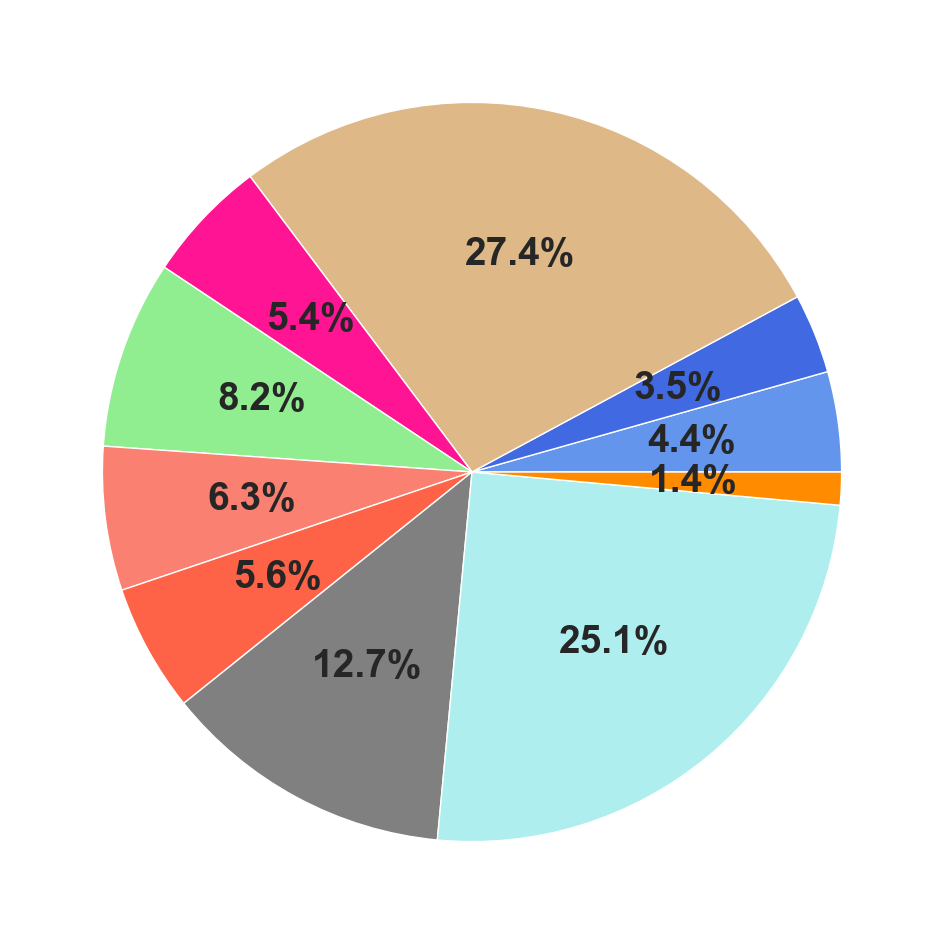

In [18]:
plt.figure(figsize=(25,12))

# graph_title = 'All Consumption Distribution - All University (Year)'
# plt.title(graph_title, fontsize=18)

all_university_yearly_sizes = np.array([yearly_kwh_non_labs_delta_temperature_area,
                                        yearly_kwh_labs_delta_temperature_area,
                                        yearly_kwh_area,
                                        yearly_kwh_c_server,
                                        yearly_kwh_wet_lab_instruments,
                                        yearly_kwh_non_labs_c_desktop,
                                        yearly_kwh_labs_c_desktop,
                                        yearly_kwh_random,
                                        yearly_kwh_indirect_consumption,
                                        yearly_kwh_heating_consumption])

# plt.pie(all_university_yearly_sizes, labels=all_university_detailed_labels, autopct='%1.1f%%', textprops={'fontsize': 20}, colors=all_university_detailed_colors)
plt.pie(all_university_yearly_sizes, autopct='%1.1f%%', textprops={'fontsize': 28, 'weight': 'bold'}, colors=all_university_detailed_colors)

plt.savefig('All Consumption Distribution - All University (detailed).png')
plt.show()

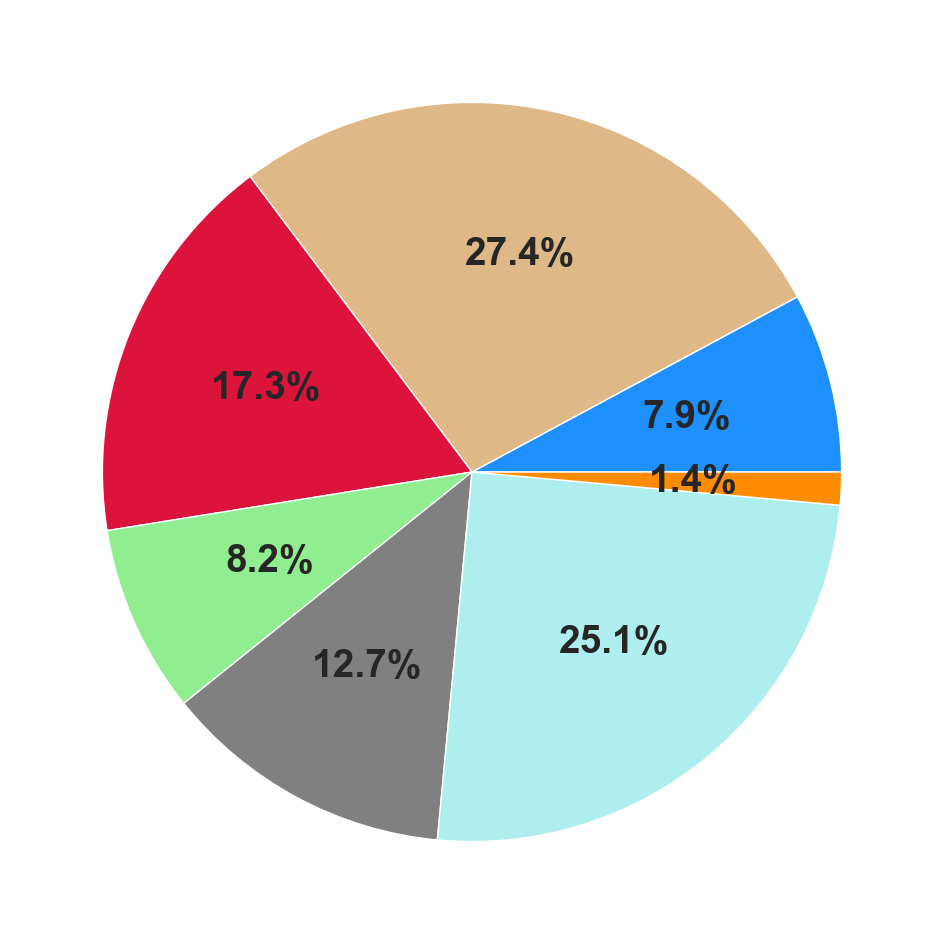

In [19]:
plt.figure(figsize=(25,12))

# graph_title = 'All Consumption Distribution - All University (Year)'
# plt.title(graph_title, fontsize=18)

all_university_yearly_sizes = np.array([yearly_kwh_non_labs_delta_temperature_area+yearly_kwh_labs_delta_temperature_area,
                                        yearly_kwh_area,
                                        yearly_kwh_c_server+yearly_kwh_non_labs_c_desktop+yearly_kwh_labs_c_desktop,
                                        yearly_kwh_wet_lab_instruments,
                                        yearly_kwh_random,
                                        yearly_kwh_indirect_consumption,
                                        yearly_kwh_heating_consumption])

# plt.pie(all_university_yearly_sizes, labels=all_university_non_detailed_labels, autopct='%1.1f%%', textprops={'fontsize': 20}, colors=all_university_non_detailed_colors)
plt.pie(all_university_yearly_sizes, autopct='%1.1f%%', textprops={'fontsize': 28, 'weight': 'bold'}, colors=all_university_non_detailed_colors)


plt.savefig('All Consumption Distribution - All University (non-detailed).png')
plt.show()

In [20]:
print("Total All Consumption - All University (Year): ", sum(all_university_yearly_sizes))

Total All Consumption - All University (Year):  42948185.23908868


### All Emissions Distribution - All University (Year)

In [21]:
yearly_kwh_indirect_consumption

10763198.288088635

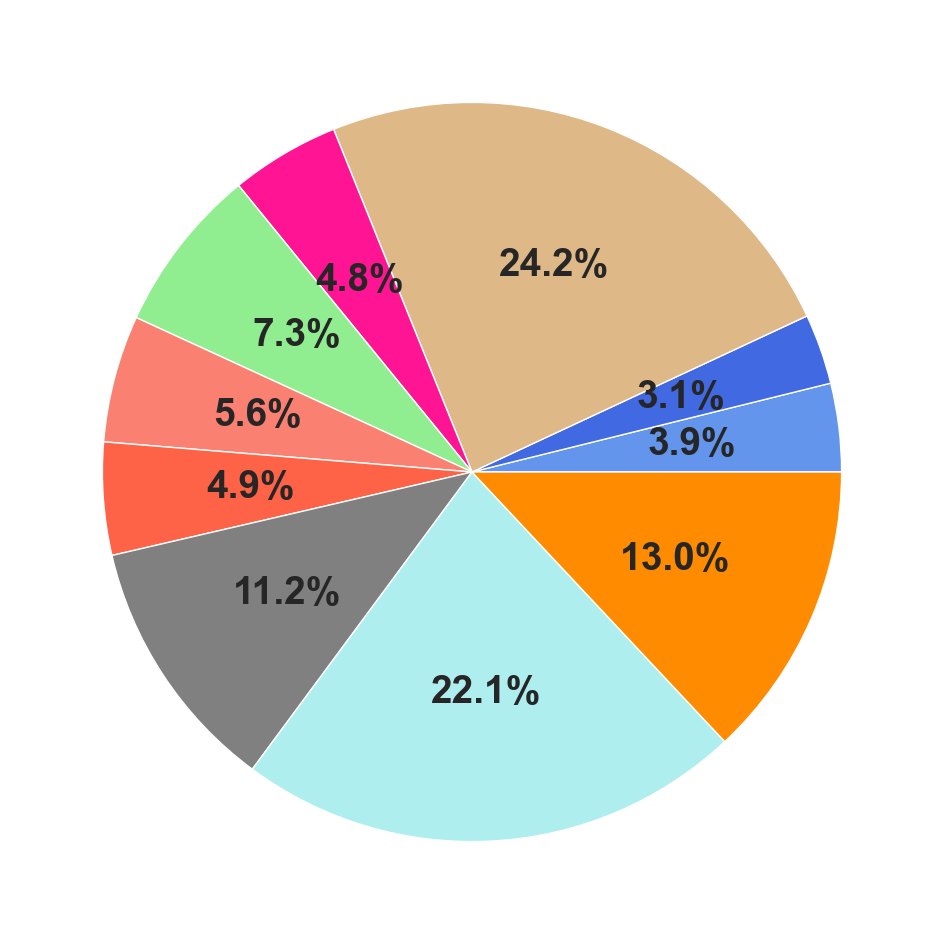

In [22]:
plt.figure(figsize=(25,12))

# graph_title = 'Emissions Distribution - All University (Year)'
# plt.title(graph_title, fontsize=18)

all_university_emissions_yearly_sizes = np.array([yearly_kwh_non_labs_delta_temperature_area*0.397,
                                        yearly_kwh_labs_delta_temperature_area*0.397,
                                        yearly_kwh_area*0.397,
                                        yearly_kwh_c_server*0.397,
                                        yearly_kwh_wet_lab_instruments*0.397,
                                        yearly_kwh_non_labs_c_desktop*0.397,
                                        yearly_kwh_labs_c_desktop*0.397,
                                        yearly_kwh_random*0.397,
                                        yearly_kwh_indirect_consumption*0.397,
                                        yearly_kwh_heating_consumption*0.397 + sum(fuel_orders_df.iloc[0])*1000*3.127])

# plt.pie(all_university_emissions_yearly_sizes, labels=all_university_detailed_labels, autopct='%1.1f%%', textprops={'fontsize': 20}, colors=all_university_detailed_colors)
plt.pie(all_university_emissions_yearly_sizes, autopct='%1.1f%%', textprops={'fontsize': 28, 'weight': 'bold'}, colors=all_university_detailed_colors)


plt.savefig('All Emissions Distribution - All University (detailed).png')
plt.show()

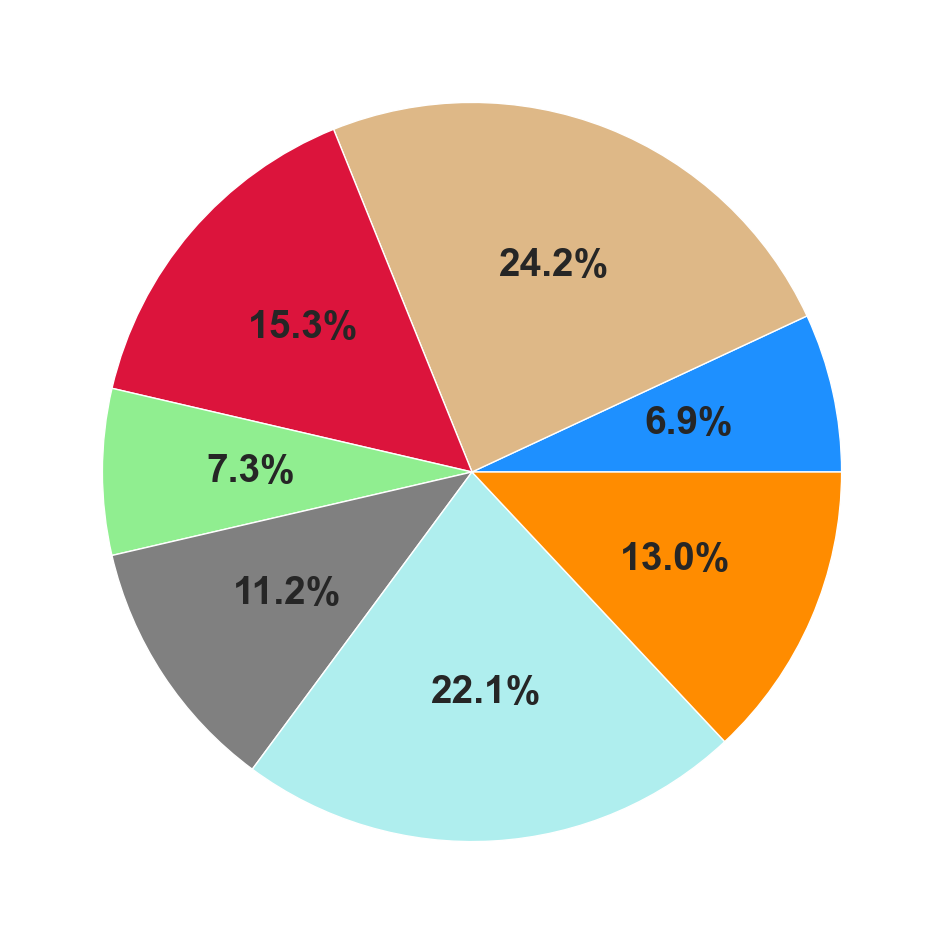

In [23]:
plt.figure(figsize=(25,12))

# graph_title = 'Emissions Distribution - All University (Year)'
# plt.title(graph_title, fontsize=18)

all_university_emissions_yearly_sizes = np.array([(yearly_kwh_non_labs_delta_temperature_area+yearly_kwh_labs_delta_temperature_area)*0.397,
                                        yearly_kwh_area*0.397,
                                        (yearly_kwh_c_server+yearly_kwh_non_labs_c_desktop+yearly_kwh_labs_c_desktop)*0.397,
                                        yearly_kwh_wet_lab_instruments*0.397,
                                        yearly_kwh_random*0.397,
                                        yearly_kwh_indirect_consumption*0.397,
                                        yearly_kwh_heating_consumption*0.397 + sum(fuel_orders_df.iloc[0])*1000*3.127])

# plt.pie(all_university_emissions_yearly_sizes, labels=all_university_non_detailed_labels, autopct='%1.1f%%', textprops={'fontsize': 20}, colors=all_university_non_detailed_colors)
plt.pie(all_university_emissions_yearly_sizes, autopct='%1.1f%%', textprops={'fontsize': 28, 'weight': 'bold'}, colors=all_university_non_detailed_colors)


plt.savefig('All Emissions Distribution - All University (non-detailed).png')
plt.show()

In [24]:
print("Total Emmisions - All University (Year): ", sum(all_university_emissions_yearly_sizes))

Total Emmisions - All University (Year):  19320068.6799182
